# DC-Motor Calculation GRAMMER Verstellung Mittelkonsole

Siehe Besuchsbericht Hans Hornung vom 11. Juni (Email)

## Motor 2233RN-4-12.0 (Constar)

In [1]:
from MotorCalc import *
import matplotlib.pyplot as plt
import numpy as np


## Kundenvorgaben

v_des = 10.0*1E-3                #Vorschub in m/s
M_des_abtrieb = 1                #Drehmoment am Abtrieb Nm
n_des_abtrieb =10.0              #Drehzahl am Abtrieb


## Benötigte mechanische Leistung

P_mech_des = n_des_abtrieb*np.pi/30*M_des_abtrieb

print("Benötigte mechanische Leistung am Abtrieb: {:0.1f} W".format(P_mech_des))

Benötigte mechanische Leistung am Abtrieb: 1.0 W


In [2]:
## Auslegung

application = 'GRAMMER Mittelkonsole'
motor_name = '2233RN-4-12.0'
GB_name = 'noch zu definieren'
GB_ratio = 990                       #Übersetzungsverhältnis Getriebe
GB_eta = 0.65                        #Schätzwert
n_WP = n_des_abtrieb*GB_ratio        #Motordrehzahl am Arbeitspunkt
M_WP = P_mech_des/(n_WP*np.pi/30)/GB_eta
n_WP_system = n_des_abtrieb
M_WP_system = M_des_abtrieb

print("Antrieb:")
print("Drehmoment: M_WP = {:0.2f}mNm/A".format(M_WP*1000.0))
print("Drehzahl:   n_WP = {:0.0f}rpm".format(n_WP))

Antrieb:
Drehmoment: M_WP = 1.55mNm/A
Drehzahl:   n_WP = 9900rpm


In [3]:
## Motor 2233RN-4-12.0 (Constar) -> teure Alternative, passt von der Stange

U_N=12
I_0=0.04
k_M=0.0107                #torque constant
R=5

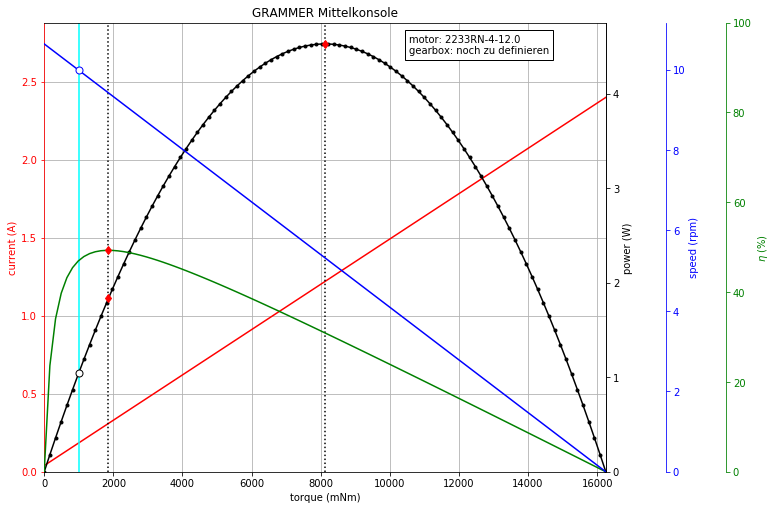

In [4]:
m=CDCMotorWithGearbox(U_N=U_N,R=R,I_0=I_0,k_M=k_M, M_WP = M_WP, n_WP = n_WP,
                     application=application, motor_name=motor_name,
                     GB_name=GB_name, GB_ratio=GB_ratio, GB_eta=GB_eta,
                     n_WP_system=n_WP_system, M_WP_system=M_WP_system)

m.plotSystemCurves()


### Tabelle mit Motor-Parametern

| Name | Unit | Value | Comment
|:---|:---:|:---:|:---
|**Input parameter**
|$U_{\rm{N}}$| V | {{m.U_N}} | rated Voltage
|$I_0$|A|{{m.I_0}}| no load current
|$k_{\rm{M}}$|mNm/A|{{"{:0.2f}".format(m.k_M*1000)}}| torque constant
|$R$|$\Omega$|{{"{:0.2f}".format(m.R)}}|terminal resistance
|**Output parameter**
|$I_{\rm{S}}$|A|{{"{:0.2f}".format(m.I_S)}}| stall current
|$I_{\rm{meff}}$|A|{{"{:0.2f}".format(m.I_meff)}}|current @ $\eta_{\rm{max}}$
|$n_0$|min$^{-1}$|{{"{:0.0f}".format(m.n_0)}}| no load speed
|$n_{\rm{meff}}$|min$^{-1}$|{{"{:0.0f}".format(m.n_meff)}}| speed @ $\eta_{\rm{max}}$
|$M_{\rm{S}}$|mNm|{{"{:0.2f}".format(m.M_S*1000)}}| stall torque
|$M_{\rm{0}}$|mNm|{{"{:0.2f}".format(m.M_0*1000)}}| loss torque
|$M_{\rm{meff}}$|mNm|{{"{:0.2f}".format(m.M_meff*1000)}}| torque @ $\eta_{\rm{max}}$
|$M_{\rm{max power}}$|mNm|{{"{:0.2f}".format(m.M_maxpower*1000)}}| torque @ $P_{\rm{max}}$
|$P_{\rm{meff}}$|W|{{"{:0.2f}".format(m.P_meff)}}| power @ $\eta_{\rm{max}}$
|$P_{\rm{max}}$|W|{{"{:0.2f}".format(m.P_maxpower)}}| max. power
|$\eta_{\rm{max}}$| % | {{"{:0.2f}".format(m.eta_max*100.0)}} | max. efficiency


Getriebe bei SGMada nachschauen, Constar kauft das bei SGMada zu.

## Berechnung mit ALDW3

In [5]:
U_N = 12.0                      #Nominalspannung [V]
I_S = 0.7                       #Haltestrom [A]
T_S = 60.1 * 9.81E-5            #Haltemoment [Nm]
R= U_N/I_S                      #Terminal Resistance [Ohm]
k_M = T_S/I_S                   #Motorkonstante [Nm/A]

print("R = {:0.2f}Ohm".format(R))
print("k_M = {:0.2f}mNm/A".format(k_M*1000.0))
print("T_S = {:0.2f}mNm".format(T_S*1000.0))

R = 17.14Ohm
k_M = 8.42mNm/A
T_S = 5.90mNm


In [6]:
## Auslegung

motor_name = 'ALDW3'
GB_name = 'noch zu definieren'
GB_ratio = 880                       #Übersetzungsverhältnis Getriebe
GB_eta = 0.65                        #Schätzwert
n_WP = n_des_abtrieb*GB_ratio        #Motordrehzahl am Arbeitspunkt [rpm]
M_WP = P_mech_des/(n_WP*np.pi/30)/GB_eta

print("Antrieb:")
print("Drehmoment: M_WP = {:0.2f}mNm/A".format(M_WP*1000.0))
print("Drehzahl:   n_WP = {:0.0f}rpm".format(n_WP))

Antrieb:
Drehmoment: M_WP = 1.75mNm/A
Drehzahl:   n_WP = 8800rpm


mechanische Leistung des Motors am Arbeitspunk: 1.6W


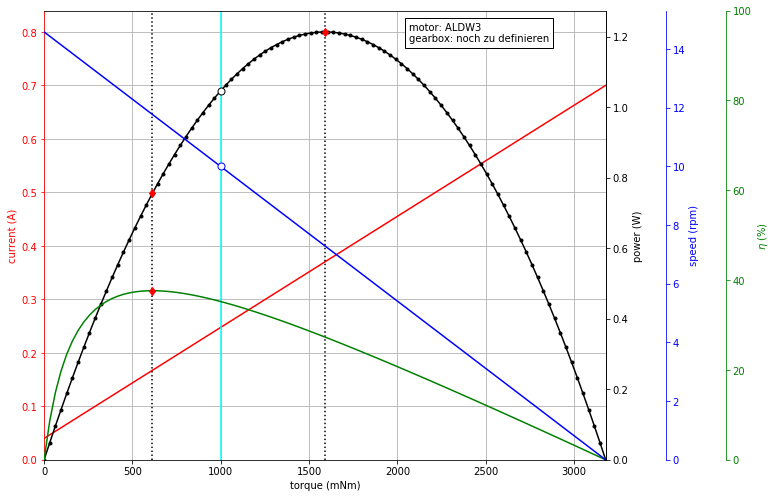

In [7]:
m=CDCMotorWithGearbox(U_N=U_N,R=R,I_0=I_0,k_M=k_M, M_WP = M_WP, n_WP = n_WP,
                     motor_name=motor_name, GB_name=GB_name,
                     GB_ratio = GB_ratio, GB_eta = GB_eta, 
                     M_WP_system=M_WP_system, n_WP_system=n_WP_system)

P_mech_WP = m.calc_P_mech_from_M(M_WP)
print("mechanische Leistung des Motors am Arbeitspunk: {:0.1f}W".format(P_mech_WP))

m.plotSystemCurves()


### Tabelle mit Motor-Parametern

| Name | Unit | Value | Comment
|:---|:---:|:---:|:---
|**Input parameter**
|$U_{\rm{N}}$| V | {{m.U_N}} | rated Voltage
|$I_0$|A|{{m.I_0}}| no load current
|$k_{\rm{M}}$|mNm/A|{{"{:0.2f}".format(m.k_M*1000)}}| torque constant
|$R$|$\Omega$|{{"{:0.2f}".format(m.R)}}|terminal resistance
|**Output parameter**
|$I_{\rm{S}}$|A|{{"{:0.2f}".format(m.I_S)}}| stall current
|$I_{\rm{meff}}$|A|{{"{:0.2f}".format(m.I_meff)}}|current @ $\eta_{\rm{max}}$
|$n_0$|min$^{-1}$|{{"{:0.0f}".format(m.n_0)}}| no load speed
|$n_{\rm{meff}}$|min$^{-1}$|{{"{:0.0f}".format(m.n_meff)}}| speed @ $\eta_{\rm{max}}$
|$M_{\rm{S}}$|mNm|{{"{:0.2f}".format(m.M_S*1000)}}| stall torque
|$M_{\rm{0}}$|mNm|{{"{:0.2f}".format(m.M_0*1000)}}| loss torque
|$M_{\rm{meff}}$|mNm|{{"{:0.2f}".format(m.M_meff*1000)}}| torque @ $\eta_{\rm{max}}$
|$M_{\rm{max power}}$|mNm|{{"{:0.2f}".format(m.M_maxpower*1000)}}| torque @ $P_{\rm{max}}$
|$P_{\rm{meff}}$|W|{{"{:0.2f}".format(m.P_meff)}}| power @ $\eta_{\rm{max}}$
|$P_{\rm{max}}$|W|{{"{:0.2f}".format(m.P_maxpower)}}| max. power
|$\eta_{\rm{max}}$| % | {{"{:0.2f}".format(m.eta_max*100.0)}} | max. efficiency


# Berechnung mit Constar 2-LS02910 2838R41-16280SL-57

## Motorauslegung

In [17]:
U_N = 9.6
I_0 = 0.040
I_S = 2.2
M_S = 561.7*9.81E-5
R = 24 / I_S
k_M=M_S/I_S


motor_name = "Constar 2-LS02910 2838R41-16280SL-57"
GB_name = "ZW 028028 256"
GB_ratio = 256                       #Übersetzungsverhältnis Getriebe
GB_eta = 0.7                         #Schätzwert
n_WP = n_des_abtrieb*GB_ratio        #Motordrehzahl am Arbeitspunkt
M_WP = P_mech_des/(n_WP*np.pi/30)/GB_eta

print("Antrieb:")
print("Drehmoment: M_WP = {:0.2f}mNm/A".format(M_WP*1000.0))
print("Drehzahl:   n_WP = {:0.0f}rpm".format(n_WP))

Antrieb:
Drehmoment: M_WP = 5.58mNm/A
Drehzahl:   n_WP = 2560rpm


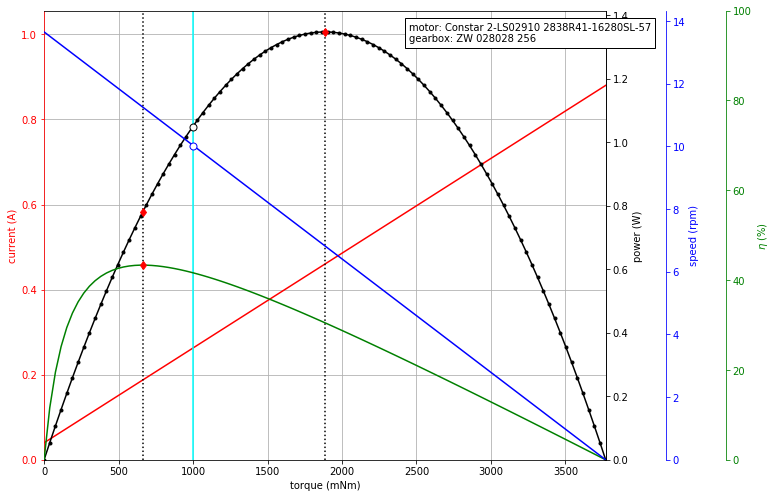

In [18]:
m=CDCMotorWithGearbox(U_N=U_N,R=R,I_0=I_0,k_M=k_M, M_WP = M_WP, n_WP = n_WP,
                      motor_name=motor_name, GB_name = GB_name, GB_ratio = GB_ratio,GB_eta=GB_eta,
                     M_WP_system = M_WP_system, n_WP_system = n_WP_system)
m.plotSystemCurves()

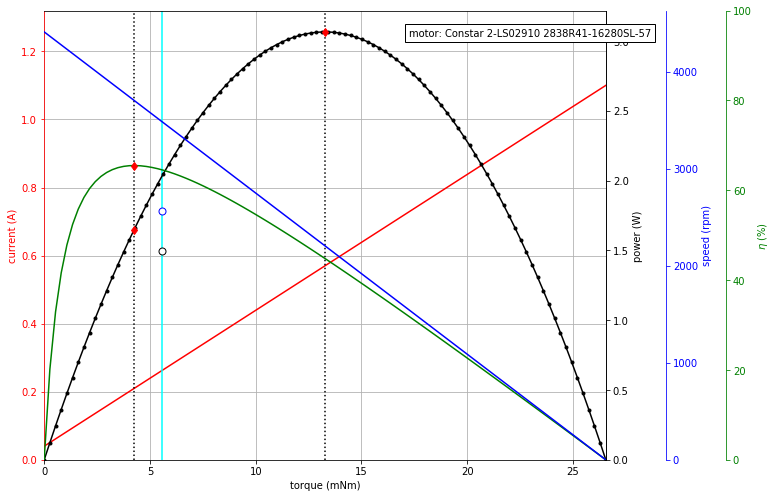

In [10]:
m.plotCurves()

### Tabelle mit Motor-Parametern

| Name | Unit | Value | Comment
|:---|:---:|:---:|:---
|**Input parameter**
|$U_{\rm{N}}$| V | {{m.U_N}} | rated Voltage
|$I_0$|A|{{m.I_0}}| no load current
|$k_{\rm{M}}$|mNm/A|{{"{:0.2f}".format(m.k_M*1000)}}| torque constant
|$R$|$\Omega$|{{"{:0.2f}".format(m.R)}}|terminal resistance
|**Output parameter**
|$I_{\rm{S}}$|A|{{"{:0.2f}".format(m.I_S)}}| stall current
|$I_{\rm{meff}}$|A|{{"{:0.2f}".format(m.I_meff)}}|current @ $\eta_{\rm{max}}$
|$n_0$|min$^{-1}$|{{"{:0.0f}".format(m.n_0)}}| no load speed
|$n_{\rm{meff}}$|min$^{-1}$|{{"{:0.0f}".format(m.n_meff)}}| speed @ $\eta_{\rm{max}}$
|$M_{\rm{S}}$|mNm|{{"{:0.2f}".format(m.M_S*1000)}}| stall torque
|$M_{\rm{0}}$|mNm|{{"{:0.2f}".format(m.M_0*1000)}}| loss torque
|$M_{\rm{meff}}$|mNm|{{"{:0.2f}".format(m.M_meff*1000)}}| torque @ $\eta_{\rm{max}}$
|$M_{\rm{max power}}$|mNm|{{"{:0.2f}".format(m.M_maxpower*1000)}}| torque @ $P_{\rm{max}}$
|$P_{\rm{meff}}$|W|{{"{:0.2f}".format(m.P_meff)}}| power @ $\eta_{\rm{max}}$
|$P_{\rm{max}}$|W|{{"{:0.2f}".format(m.P_maxpower)}}| max. power
|$\eta_{\rm{max}}$| % | {{"{:0.2f}".format(m.eta_max*100.0)}} | max. efficiency

In [1]:
print(1.9*1000*9.81E-5)

0.18639
